# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [838]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

## Читаем сохранённый файл

In [839]:
df = pd.read_csv('../data/am_pm.csv')
df

,date,am,pm,target,predict
0,2020-04-17,21,2,working_day,weekend
1,2020-04-18,1,68,weekend,working_day
2,2020-04-19,18,15,weekend,working_day
3,2020-04-20,2,23,working_day,working_day
4,2020-04-21,0,25,working_day,working_day
5,2020-04-22,0,28,working_day,working_day
6,2020-04-23,10,33,working_day,working_day
7,2020-04-24,2,14,working_day,working_day
8,2020-04-25,30,74,weekend,working_day
9,2020-04-26,28,233,weekend,working_day


## Подготовка для обучения выявления границы

In [840]:
X = df[['am', 'pm']]
y = (df['target'] == 'weekend').astype(int)

model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Функция для графика с границей

In [841]:
def plot_with_boundary(ax, df, label_col, title):
    ax.scatter(df[df[label_col] == 'working_day']['am'],
               df[df[label_col] == 'working_day']['pm'],
               color='blue', label='Working day')
    ax.scatter(df[df[label_col] == 'weekend']['am'],
               df[df[label_col] == 'weekend']['pm'],
               color='red', label='Weekend')
    
    # решётка точек
    x_min, x_max = df['am'].min() - 1, df['am'].max() + 1
    y_min, y_max = df['pm'].min() - 1, df['pm'].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))

    # Делаем DataFrame с теми же названиями признаков
    grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['am', 'pm'])

    # Предсказания
    probs = model.predict(grid).reshape(xx.shape)
    
    # линия разделения
    # Коэффициенты модели
    w1, w2 = model.coef_[0]

    # Диапазон по оси am
    am_vals = np.array([df['am'].min() - 1, df['am'].max() + 1])

    # Рассчёт pm по формуле линии
    pm_vals = - (w1 / w2) * am_vals

    # Нарисуем линию
    ax.plot(am_vals, pm_vals, color='red', linewidth=2, label='Decision boundary')
    
    ax.set_title(title)
    ax.set_xlabel('AM commits')
    ax.set_ylabel('PM commits')
    ax.legend()
    ax.grid(True)

## Построение графиков

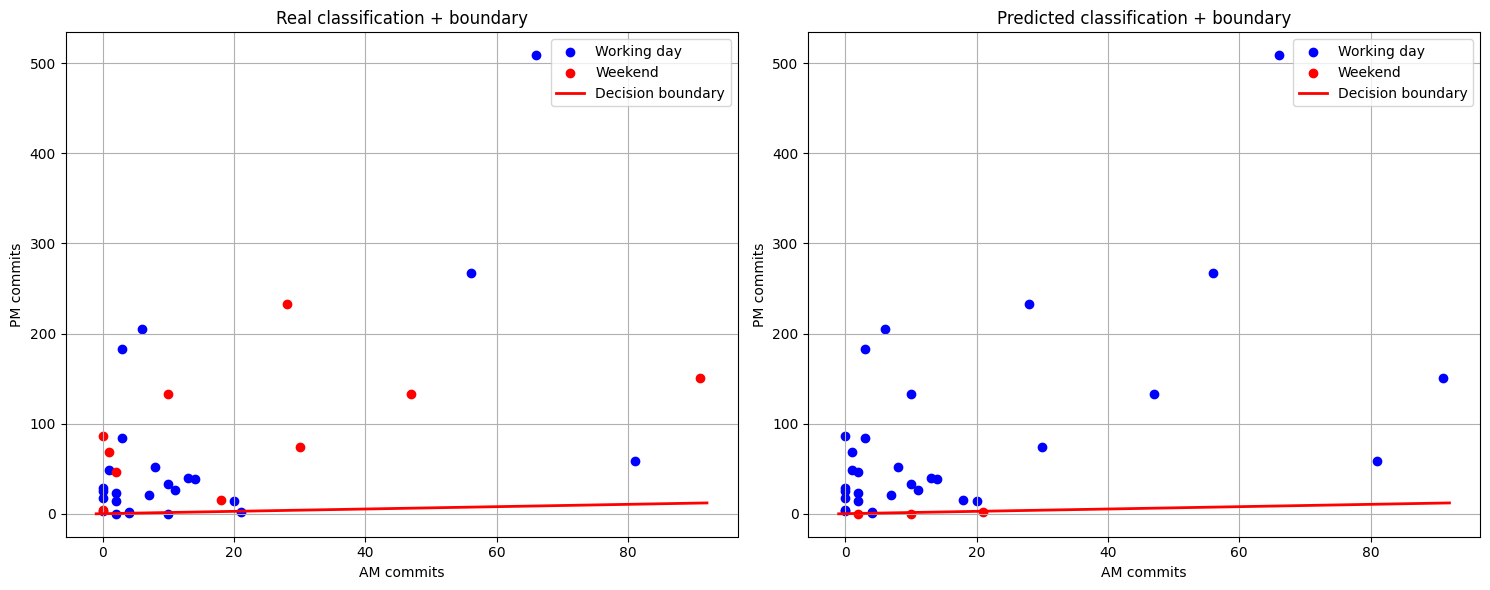

In [842]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

plot_with_boundary(axes[0], df, 'target', 'Real classification + boundary')
plot_with_boundary(axes[1], df, 'predict', 'Predicted classification + boundary')

plt.tight_layout()
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

StandardScaler преобразует признаки так, чтобы каждый из них имел среднее 0 и стандартное отклонение 1. Это помогает модели лучше обучаться.

Возможно, после масштабирования точность модели повысится по сравнению с предыдущей.

Графики помогут визуально понять, как модель разделяет классы после масштабирования.

## Масштабирование признаков

In [843]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Обучение логистической регрессии на масштабированных данных

In [844]:
model_scaled = LogisticRegression(random_state=21, fit_intercept=False)
model_scaled.fit(X_scaled, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Предсказания и accuracy

In [845]:
pred_scaled_num = model_scaled.predict(X_scaled)
pred_scaled = np.where(pred_scaled_num == 1, 'weekend', 'working_day')
df['predict_scaled'] = pred_scaled

In [846]:
acc_scaled = accuracy_score(df['target'], df['predict_scaled'])

## Наивный классификатор

In [847]:
most_common_class = df['target'].mode()[0]
naive_pred = [most_common_class] * len(df)
acc_naive = accuracy_score(df['target'], naive_pred)

In [848]:
print(f'Accuracy масштабированной модели: {acc_scaled}')
print(f'Accuracy наивного классификатора: {acc_naive}')
print(f'Самый популярный класс: {most_common_class}')

Accuracy масштабированной модели: 0.7428571428571429
Accuracy наивного классификатора: 0.7142857142857143
Самый популярный класс: working_day


## Функция для построения графика с линией решения (с масштабированием)

In [849]:
def plot_with_boundary_scaled(ax, df, label_col, title, scaler, model):
    # Визуализация точек (не масштабируемые для удобства)
    ax.scatter(df[df[label_col] == 'working_day']['am'],
               df[df[label_col] == 'working_day']['pm'],
               color='blue', label='Working day')
    ax.scatter(df[df[label_col] == 'weekend']['am'],
               df[df[label_col] == 'weekend']['pm'],
               color='red', label='Weekend')
    
    # Линия решения нужно рисовать в масштабированном пространстве,
    # поэтому создадим сетку в исходных координатах, затем масштабируем её
    
    x_min, x_max = df['am'].min() - 1, df['am'].max() + 1
   
    
    am_vals = np.array([x_min, x_max])
    
    # Линия решения в масштабе:
    # решаем w1 * am_scaled + w2 * pm_scaled = 0
    w1, w2 = model.coef_[0]
    
    # Чтобы найти pm_scaled, выразим pm_scaled через am_scaled:
    # pm_scaled = - (w1 / w2) * am_scaled
    
    # Но нам нужна pm в исходных координатах,
    # поэтому сначала масштабируем am_vals, затем вычислим pm_scaled,
    # потом обратно преобразуем pm_scaled в исходный масштаб.
    
    grid_df = pd.DataFrame(np.c_[am_vals, np.zeros_like(am_vals)], columns=['am', 'pm'])
    am_scaled = scaler.transform(grid_df)[:, 0]
    
    pm_scaled = - (w1 / w2) * am_scaled
    
    # Теперь обратно в исходный масштаб по pm
    # pm = pm_scaled * std_pm + mean_pm
    mean_pm = scaler.mean_[1]
    std_pm = np.sqrt(scaler.var_[1])
    pm_vals = pm_scaled * std_pm + mean_pm
    
    # Рисуем линию
    ax.plot(am_vals, pm_vals, color='red', linewidth=2, label='Decision boundary')

    ax.set_title(title)
    ax.set_xlabel('AM commits')
    ax.set_ylabel('PM commits')
    ax.legend()
    ax.grid(True)

## Построение графиков

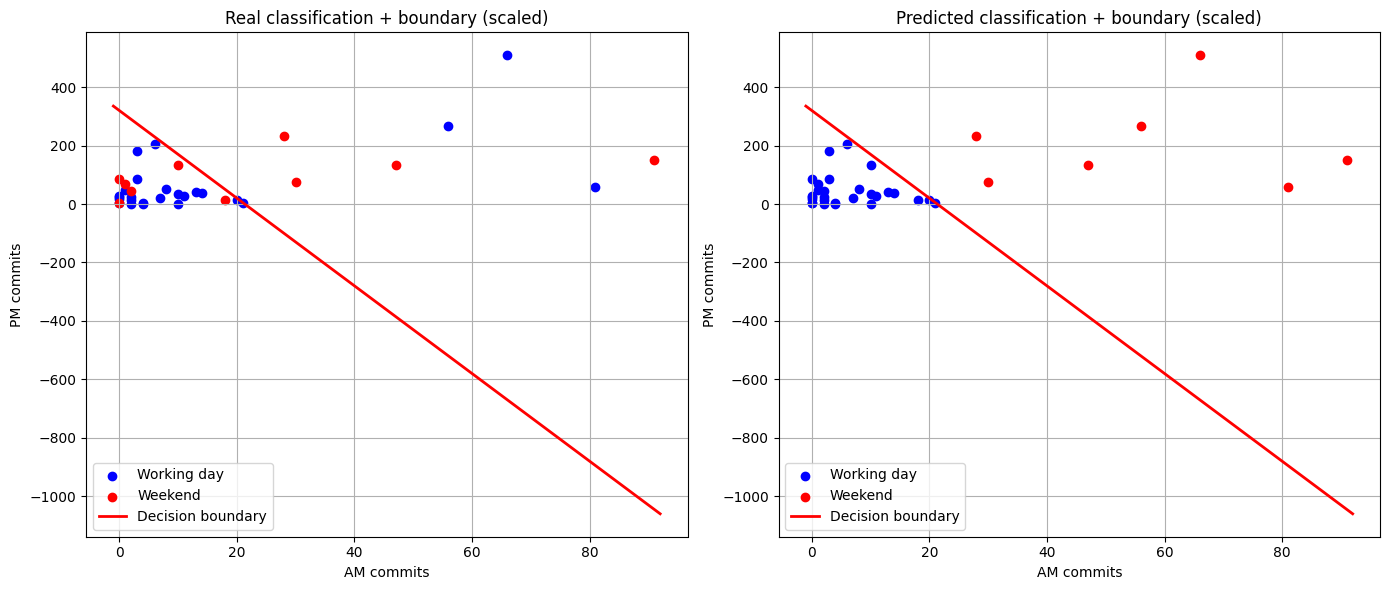

In [850]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_with_boundary_scaled(axes[0], df, 'target', 'Real classification + boundary (scaled)', scaler, model_scaled)
plot_with_boundary_scaled(axes[1], df, 'predict_scaled', 'Predicted classification + boundary (scaled)', scaler, model_scaled)

plt.tight_layout()
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

SVC (Support Vector Classifier) – это модель машинного обучения, используемая для классификации данных. Она основана на методе опорных векторов (support vector machines, SVM). Основная идея заключается в нахождении оптимальной гиперплоскости, которая разделяет классы данных так, чтобы минимизировать количество ошибок.

Основные характеристики SVC:

- Высокая точность: SVC часто демонстрирует высокую точность на задачах классификации, особенно когда данные хорошо разделяются.
- Устойчивость к шумам: Модель устойчива к шумам и аномальным значениям благодаря использованию мягкого метода классификации.
- Гибкость: Поддерживает различные типы ядер (kernels), что позволяет адаптировать модель под конкретные задачи.
- Алгоритмы оптимизации: В основе SVC лежит сложный метод оптимизации, который пытается найти оптимальную границу разделения классов.

Пример использования SVC может включать классификацию текстов на категории, распознавание изображений, медицинская диагностика и многие другие задачи, где требуется четко разделить несколько классов данных.

Параметр probability=True нужен, чтобы потом можно было получить вероятности принадлежности к классам (не обязательно для accuracy).

Ядра — разные функции преобразования пространства признаков (linear, rbf, poly, sigmoid). Они влияют на форму границы решения.

## Нужно сравнить accuracy с разными ядрами и выбрать лучшее

In [851]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
models = {}
accuracies = {}
best_acc = 0
best_kernel = None
best_model = None
for kernel in kernels:
    svc = SVC(kernel=kernel, probability=True, random_state=21)
    svc.fit(X_scaled, y)
    preds = svc.predict(X_scaled)
    acc = accuracy_score(y, preds)
    models[kernel] = svc
    accuracies[kernel] = acc
    print(f"Kernel: {kernel}, Accuracy: {acc}")
    if acc > best_acc:
        best_acc = acc
        best_kernel = kernel
        best_model = svc

print(f"\nЛучшее ядро: {best_kernel} с accuracy = {best_acc}")

Kernel: linear, Accuracy: 0.7142857142857143
Kernel: rbf, Accuracy: 0.7428571428571429
Kernel: poly, Accuracy: 0.7428571428571429
Kernel: sigmoid, Accuracy: 0.6857142857142857

Лучшее ядро: rbf с accuracy = 0.7428571428571429


## Визуализация результата — точки и граница решения

Мы видим, что нам подходит два ядра, поэтому покажем оба варианта

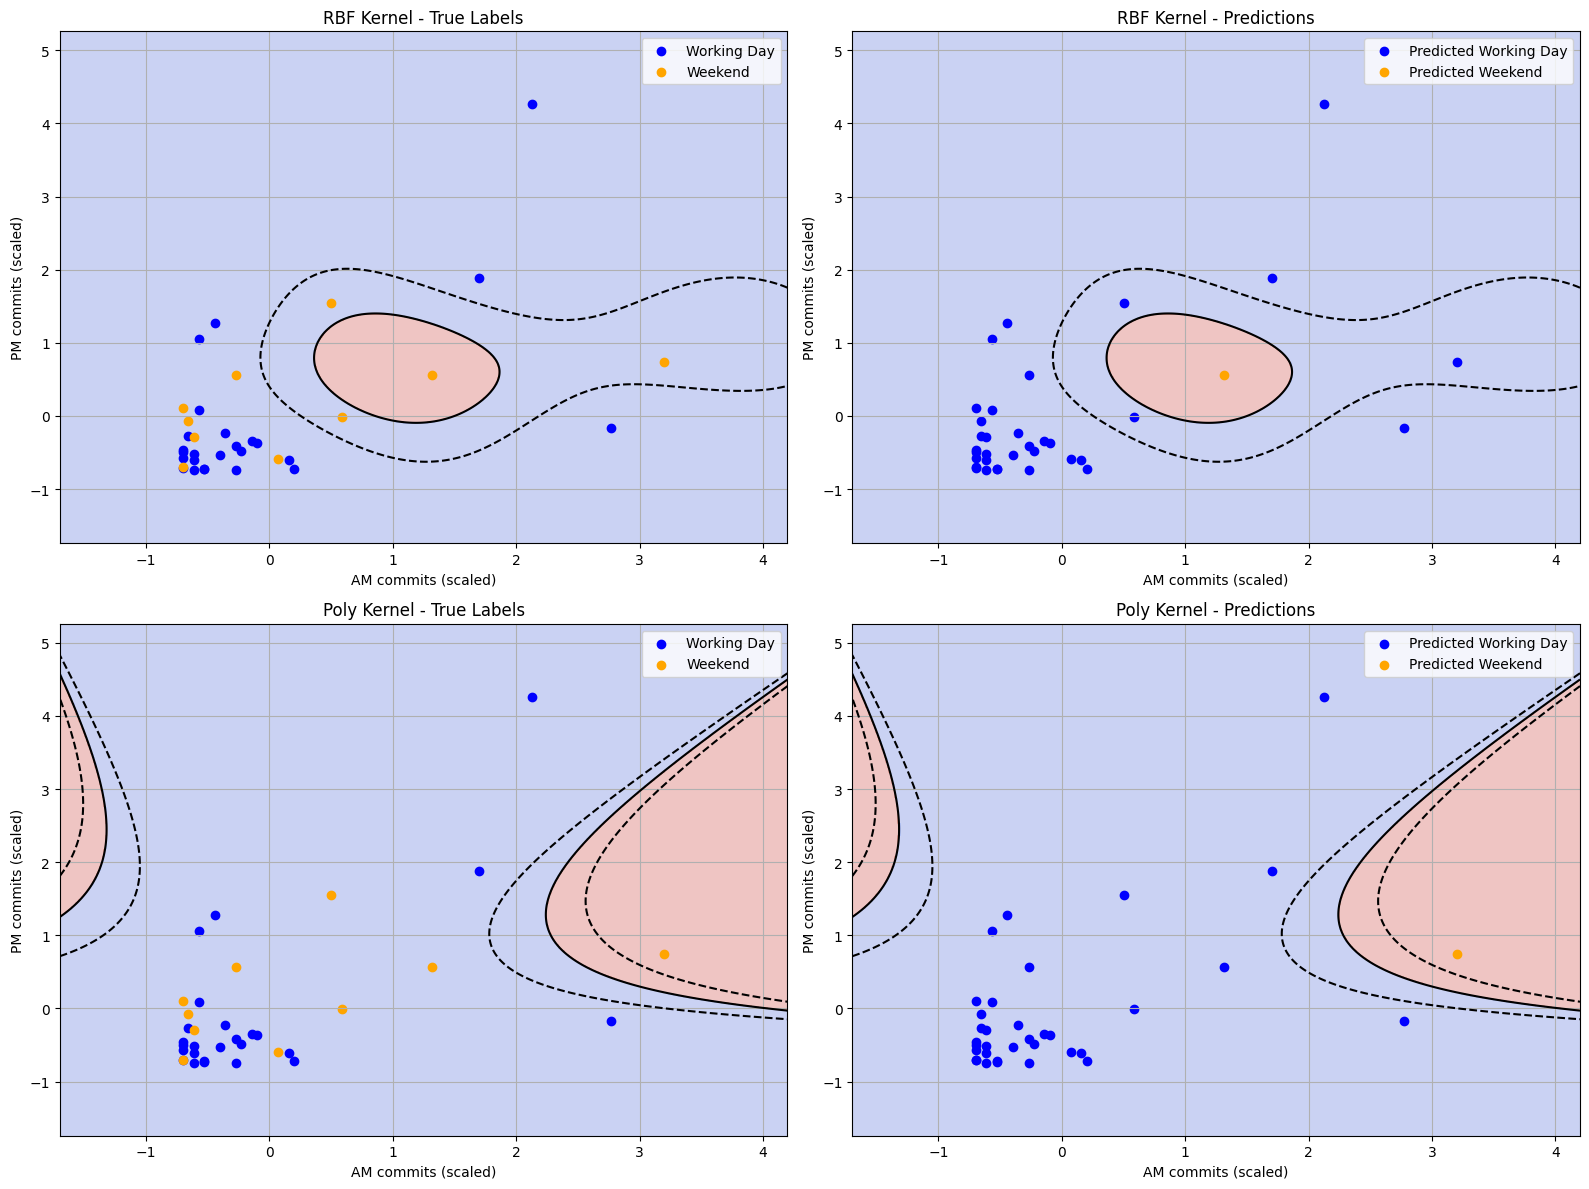

In [852]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Функция для рисования с истинными метками
def plot_with_true_labels_contour(ax, X, y, model, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    Z = model.predict(grid).reshape(xx.shape)
    decision_vals = model.decision_function(grid).reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.contour(xx, yy, decision_vals, colors='k', levels=[-0.5, 0, 0.5],
               linestyles=['--', '-', '--'])
    ax.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Working Day')
    ax.scatter(X[y == 1, 0], X[y == 1, 1], color='orange', label='Weekend')
    ax.set_title(title)
    ax.set_xlabel('AM commits (scaled)')
    ax.set_ylabel('PM commits (scaled)')
    ax.legend()
    ax.grid(True)

# Функция для рисования с предсказаниями
def plot_with_preds_contour(ax, X, preds, model, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    Z = model.predict(grid).reshape(xx.shape)
    decision_vals = model.decision_function(grid).reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.contour(xx, yy, decision_vals, colors='k', levels=[-0.5, 0, 0.5],
               linestyles=['--', '-', '--'])
    ax.scatter(X[preds == 0, 0], X[preds == 0, 1], color='blue', label='Predicted Working Day')
    ax.scatter(X[preds == 1, 0], X[preds == 1, 1], color='orange', label='Predicted Weekend')
    ax.set_title(title)
    ax.set_xlabel('AM commits (scaled)')
    ax.set_ylabel('PM commits (scaled)')
    ax.legend()
    ax.grid(True)

# Получаем предсказания
preds_rbf = models['rbf'].predict(X_scaled)
preds_poly = models['poly'].predict(X_scaled)

plot_with_true_labels_contour(axes[0, 0], X_scaled, y, models['rbf'], 'RBF Kernel - True Labels')
plot_with_preds_contour(axes[0, 1], X_scaled, preds_rbf, models['rbf'], 'RBF Kernel - Predictions')
plot_with_true_labels_contour(axes[1, 0], X_scaled, y, models['poly'], 'Poly Kernel - True Labels')
plot_with_preds_contour(axes[1, 1], X_scaled, preds_poly, models['poly'], 'Poly Kernel - Predictions')

plt.tight_layout()
plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

## Обучаем дерево с max_depth=4

In [853]:
le = LabelEncoder()
y_encoded = le.fit_transform(df['target'])  # working_day -> 0, weekend -> 1

In [854]:
X = df[['am', 'pm']]

In [855]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [856]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=42)
dtc.fit(X_scaled, y_encoded)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Считаем accuracy

In [857]:
preds = dtc.predict(X_scaled)
acc = accuracy_score(y_encoded, preds)
print(f"Accuracy with max_depth=4: {acc:.4f}")

Accuracy with max_depth=4: 0.9429


## Пробуем разные max_depth

In [858]:
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_scaled, y)
    preds_d = model.predict(X_scaled)
    acc_d = accuracy_score(y, preds_d)
    print(f"max_depth={depth}, Accuracy={acc_d}")

max_depth=1, Accuracy=0.7714285714285715
max_depth=2, Accuracy=0.8571428571428571
max_depth=3, Accuracy=0.8857142857142857
max_depth=4, Accuracy=0.9428571428571428
max_depth=5, Accuracy=0.9714285714285714
max_depth=6, Accuracy=1.0
max_depth=7, Accuracy=1.0
max_depth=8, Accuracy=1.0
max_depth=9, Accuracy=1.0
max_depth=10, Accuracy=1.0


## Функция для рисования decision boundary для дерева (аналогично SVC, но decision_function нет, поэтому используем predict на сетке)

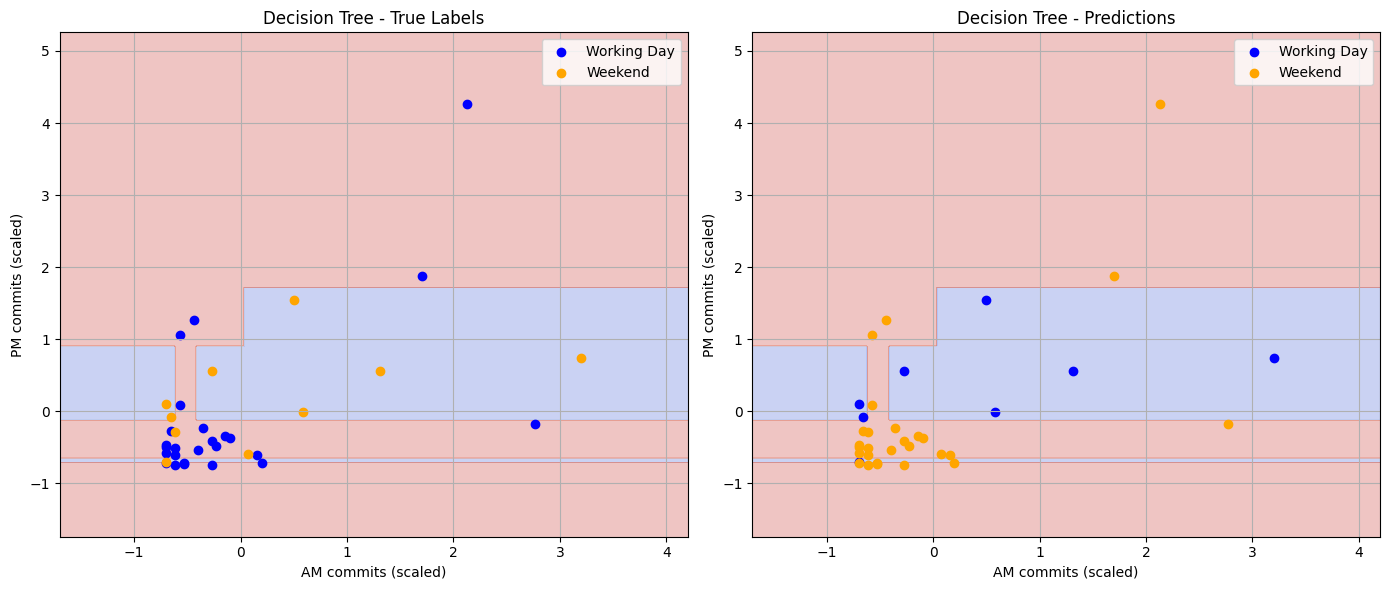

In [859]:
def plot_tree_decision_boundary(ax, X, y, model, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[y==0,0], X[y==0,1], color='blue', label='Working Day')
    ax.scatter(X[y==1,0], X[y==1,1], color='orange', label='Weekend')
    ax.set_title(title)
    ax.set_xlabel('AM commits (scaled)')
    ax.set_ylabel('PM commits (scaled)')
    ax.legend()
    ax.grid(True)

fig, axes = plt.subplots(1, 2, figsize=(14,6))
plot_tree_decision_boundary(axes[0], X_scaled, y, dtc, 'Decision Tree - True Labels')
plot_tree_decision_boundary(axes[1], X_scaled, preds, dtc, 'Decision Tree - Predictions')
plt.tight_layout()
plt.show()

## Визуализируем само дерево решений

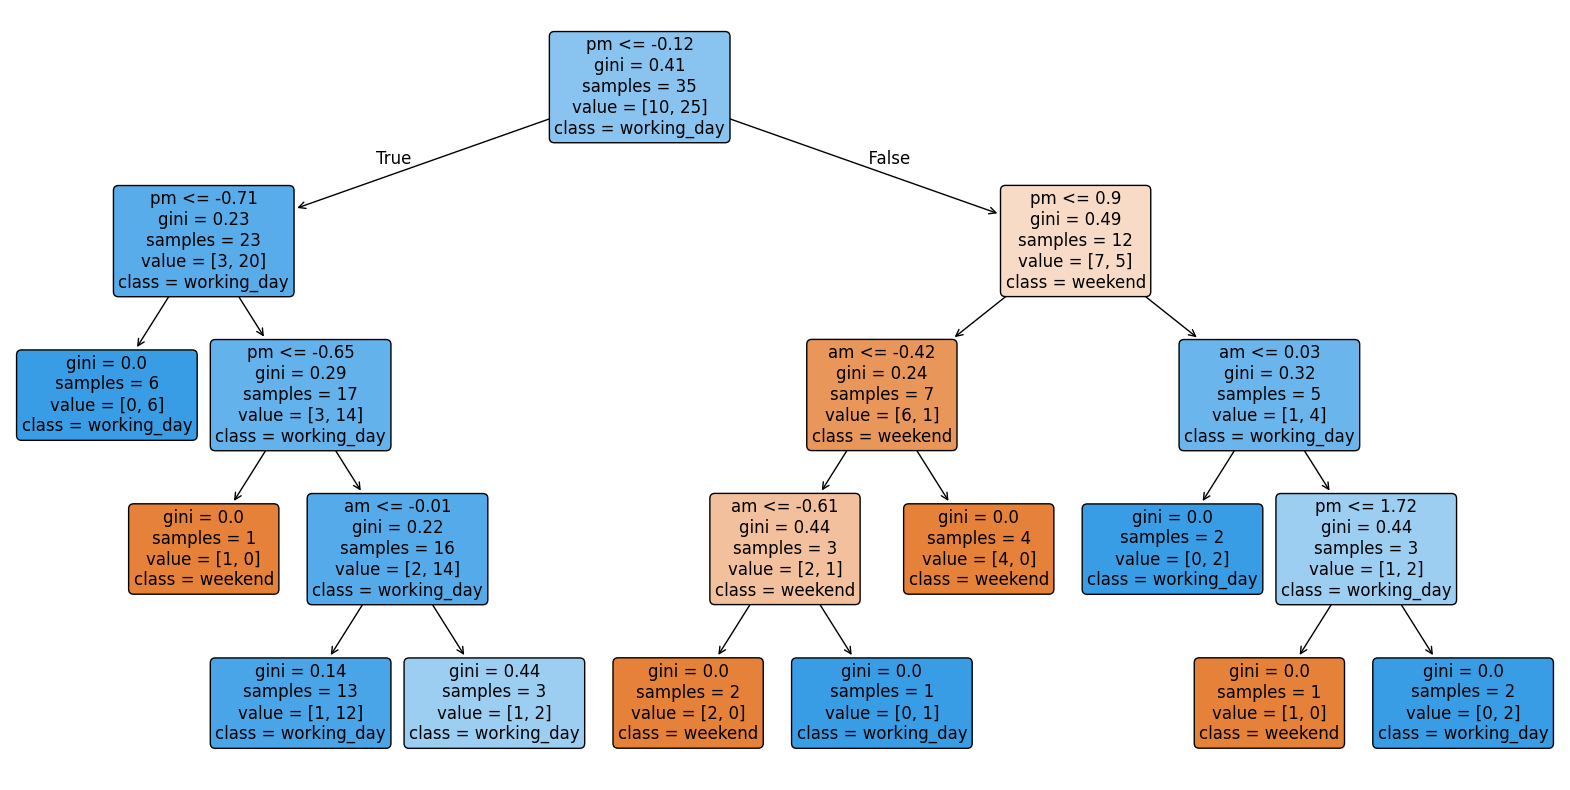

In [860]:
plt.figure(figsize=(20,10))
plot_tree(
    dtc, 
    feature_names=['am', 'pm'], 
    class_names=le.classes_,  # Здесь используем строки из LabelEncoder
    filled=True, 
    rounded=True, 
    precision=2, 
    fontsize=12
)
plt.show()

In [ ]:
leaves_mask = (dtc.tree_.children_left == -1)
leaves_indices = np.where(leaves_mask)[0]

leaf_classes = dtc.tree_.value[leaves_indices].argmax(axis=2).flatten()
working_day_leaves = np.sum(leaf_classes == 0)

print(f"Количество листьев, маркирующих дни как рабочие: {working_day_leaves}")

Количество листьев, маркирующих дни как рабочие: 4


## How many leaves in the visualized tree label days as working days?

Answer: 4 leaves